# Data preprocessing and artifact removal

Nous nous sommes basé sur [Ce tutorial](https://mne.tools/stable/auto_tutorials/preprocessing/plot_40_artifact_correction_ica.html#sphx-glr-auto-tutorials-preprocessing-plot-40-artifact-correction-ica-py). Les composantes indépendantes utilisées ici sont  celles calculées dans le [repo](https://github.com/sstober/openmiir/tree/master/eeg/preprocessing) du dataset. 



The data :
-  5 blocks that each comprised all 12 stimuli in randomized order: 60 perception trials per subject.
- EEG was recorded with a BioSemi Active-Two system using 64+2 EEG channels at 512 Hz. 
- Hor- izontal and vertical electrooculography (EOG) channels were used to record eye movements. 

To do :

- remove and interpolate bad EEG channels (between 0 and 3 per subject) identified by manual visual inspection.
- Filter with a bandpass keeping a frequency range between 0.5 and 30 Hz ( this also remove any slow signal drift in the EEG) 
- To remove artifacts caused by eye blinks, we computed ICA  and semi-automatically removed components that had a high correlation with the EOG channels.
- Reconstruct from the remaining independent components without reducing dimensionality. 
- all trial channels were additionally normalized to zero mean and range [−1, 1].

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from mne.preprocessing import read_ica, ICA
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/openmiir/README.md
/kaggle/input/openmiir/.gitignore
/kaggle/input/openmiir/scripts/README.md
/kaggle/input/openmiir/scripts/presentation/OpenMIIR_StimulusPresentation.m
/kaggle/input/openmiir/scripts/presentation/README.md
/kaggle/input/openmiir/scripts/presentation/music.mat
/kaggle/input/openmiir/scripts/eeglab/fif2mat.py
/kaggle/input/openmiir/scripts/eeglab/import_raw.m
/kaggle/input/openmiir/scripts/eeglab/biosemi64_NoM.locs
/kaggle/input/openmiir/logo/OpenMIIR-logo_transparent_728x265.png
/kaggle/input/openmiir/eeg/OpenMIIR-RawEEG_v1.torrent
/kaggle/input/openmiir/eeg/preprocessing/README.md
/kaggle/input/openmiir/eeg/preprocessing/notebooks/Subject P04.ipynb
/kaggle/input/openmiir/eeg/preprocessing/notebooks/Subject P01.ipynb
/kaggle/input/openmiir/eeg/preprocessing/notebooks/Subject P05.ipynb
/kaggle/input/openmiir/eeg/preprocessing/notebooks/Subject P12.ipynb
/kaggle/input/openmiir/eeg/preprocessing/notebooks/Subject P09.ipynb
/kaggle/input/openmiir/eeg/preproce

In [2]:
!ls /kaggle/input/rawsbeforehoes/

P01-raw.fif  P05-raw.fif  P07-raw.fif  P11-raw.fif  P13-raw.fif
P04-raw.fif  P06-raw.fif  P09-raw.fif  P12-raw.fif  P14-raw.fif


In [3]:
import matplotlib.pyplot as plt

import mne
from mne import read_proj
from mne.io import read_raw_fif

from mne.datasets import sample
import os

In [4]:
path = "/kaggle/input/rawsbeforehoes/P01-raw.fif"
raw = mne.io.read_raw_fif(path,preload=True)

Opening raw data file /kaggle/input/rawsbeforehoes/P01-raw.fif...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 64)  idle
    Range : 0 ... 2478165 =      0.000 ...  4840.166 secs
Ready.
Reading 0 ... 2478165  =      0.000 ...  4840.166 secs...


In [5]:
raw.info

<Info | 11 non-empty values
 bads: 3 items (P8, P10, T8)
 ch_names: Fp1, AF7, AF3, F1, F3, F5, F7, FT7, FC5, FC3, FC1, C1, C3, C5, ...
 chs: 64 EEG, 4 EOG, 1 STIM
 custom_ref_applied: False
 file_id: 4 items (dict)
 highpass: 0.0 Hz
 lowpass: 104.0 Hz
 meas_date: 2015-01-28 17:39:57 UTC
 meas_id: 4 items (dict)
 nchan: 69
 projs: Average EEG reference: off
 sfreq: 512.0 Hz
>

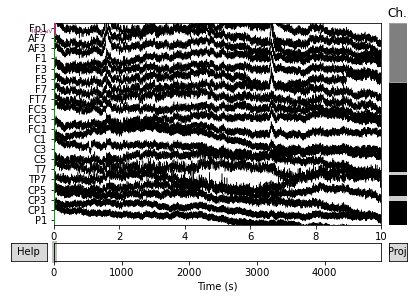

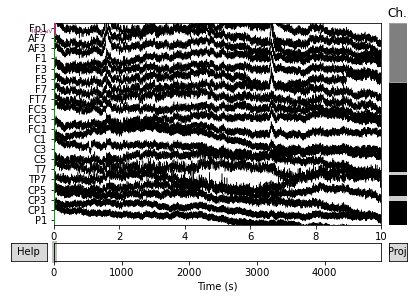

In [6]:
raw.plot()

In [7]:
ica = read_ica('/kaggle/input/openmiir/eeg/preprocessing/ica/P01-100p_64c-ica.fif')


Reading /kaggle/input/openmiir/eeg/preprocessing/ica/P01-100p_64c-ica.fif ...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 64)  idle
Now restoring ICA solution ...
Ready.


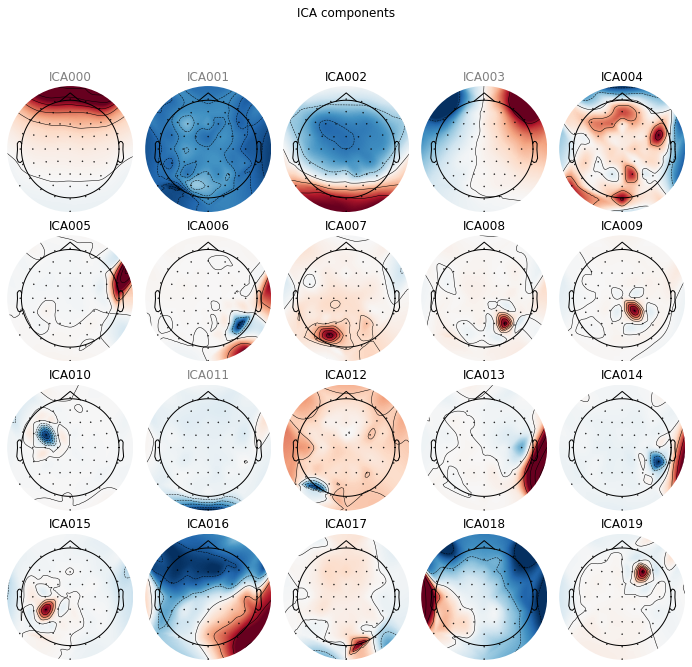

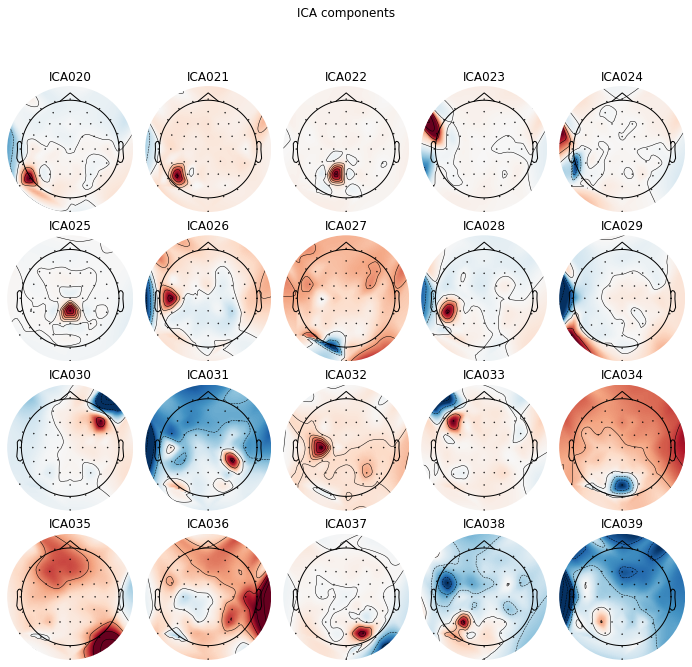

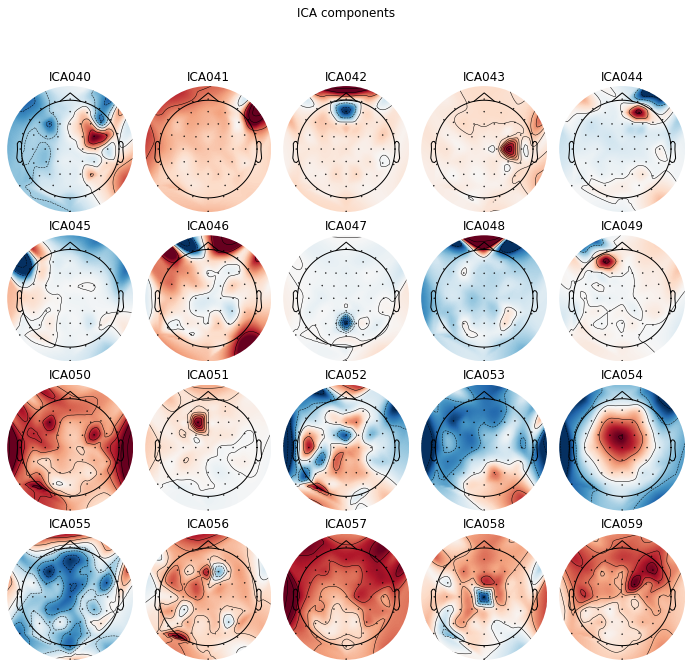

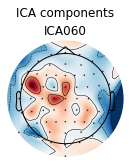

[<Figure size 702x678.24 with 20 Axes>,
 <Figure size 702x678.24 with 20 Axes>,
 <Figure size 702x678.24 with 20 Axes>,
 <Figure size 140.4x169.56 with 1 Axes>]

In [8]:
ica.plot_components()


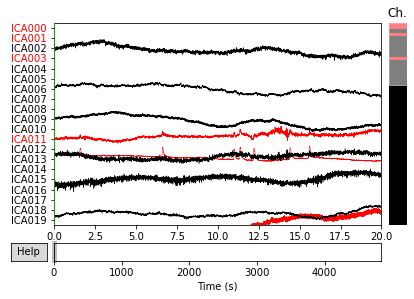

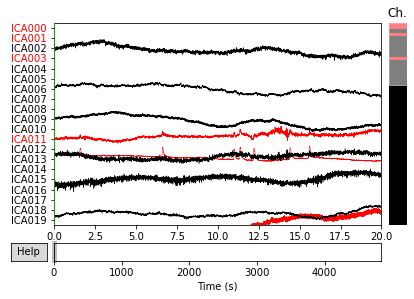

In [9]:
ica.plot_sources(raw)

In [10]:
reconst_raw = raw.copy()
s = ica.apply(reconst_raw)

Transforming to ICA space (61 components)
Zeroing out 4 ICA components


In [11]:
X = raw.get_data()
X_clean = s.get_data()

In [12]:
sfreq = raw.info['sfreq']

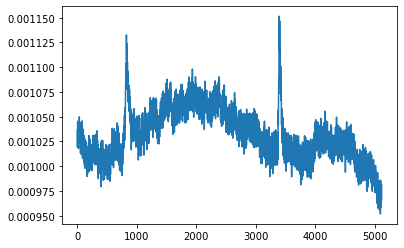

In [13]:
from pylab import *
plot(X[1, 0:int(10 * sfreq)])

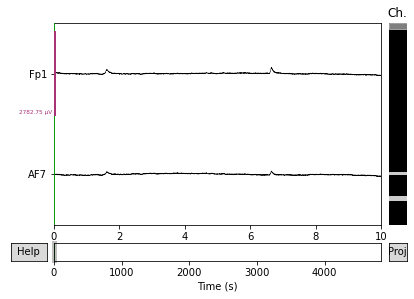

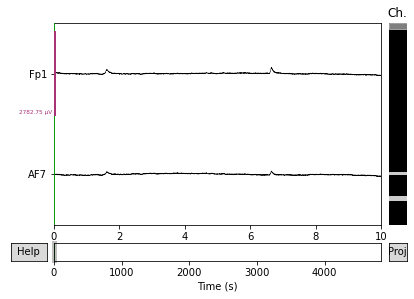

In [14]:
raw.plot(n_channels = 2, scalings = 'auto')

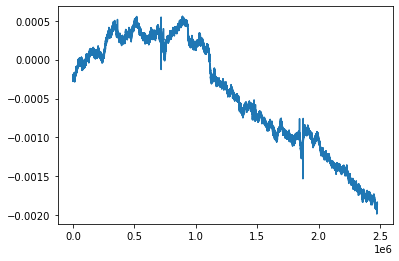

In [15]:
plot(X_clean[0])

Effective window size : 4.000 (s)


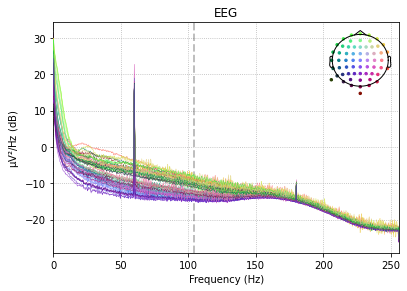

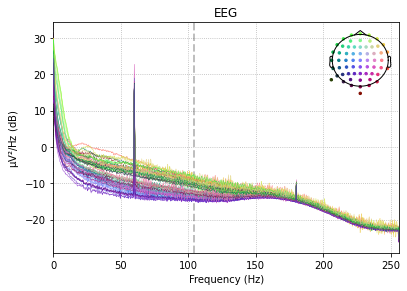

In [16]:
raw.plot_psd()

Effective window size : 4.000 (s)


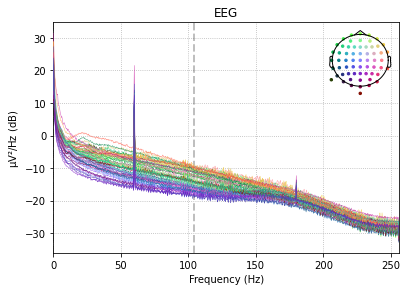

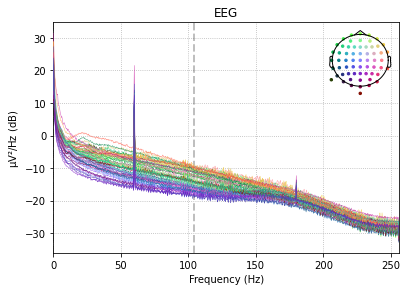

In [17]:
reconst_raw.plot_psd()

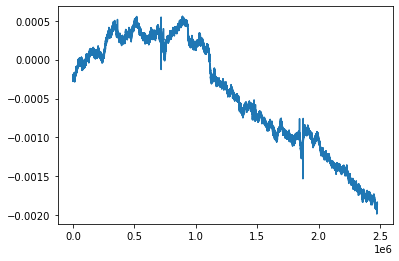

In [18]:
plot(X_clean[0])

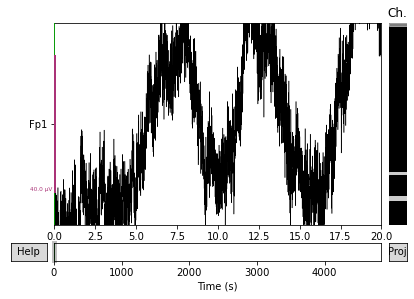

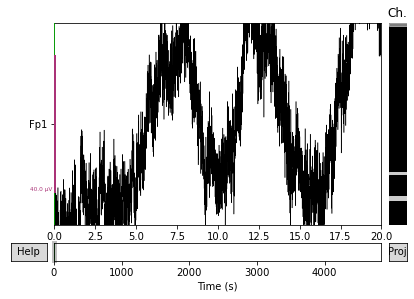

In [19]:
reconst_raw.plot(duration=20.0, start=0.0, n_channels=1)

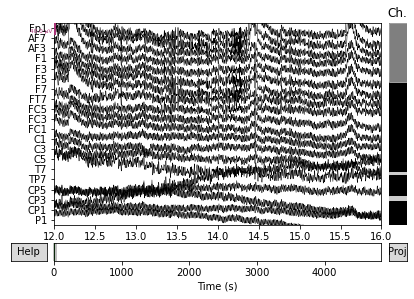

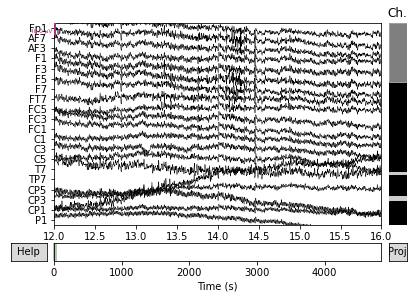

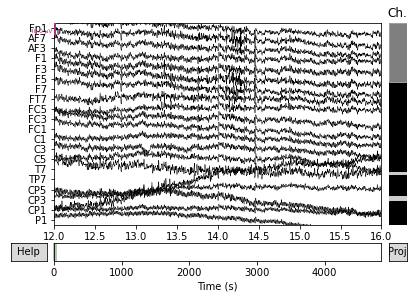

In [20]:
# show some frontal channels to clearly illustrate the artifact removal
chs = raw.ch_names
chan_idxs = [raw.ch_names.index(ch) for ch in chs]
raw.plot(order=chan_idxs, start=12, duration=4)
reconst_raw.plot(order=chan_idxs, start=12, duration=4)